# Importing Libraries
Import the necessary libraries, including NumPy, Pandas, Matplotlib, Seaborn, and Scikit-learn.


In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # plotting
from sklearn.model_selection import train_test_split # splitting data
from sklearn.preprocessing import MinMaxScaler # scaling data
from sklearn.preprocessing import RobustScaler
import category_encoders as ce # encoding categorical data
from sklearn.linear_model import LinearRegression # linear regression
from sklearn.tree import DecisionTreeRegressor # decision tree
from sklearn.ensemble import RandomForestRegressor # random forest
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # regression metrics
from sklearn.model_selection import GridSearchCV # hyperparameter tuning



# Loading the Dataset
Load the dataset using Pandas and display the first few rows.

In [2]:
# Load the dataset using Pandas
df=pd.read_csv('/Users/ry7vv/Documents/Coding_Project/PythonFile/ML/RealRental/dubai_properties.csv')


# Exploring the Dataset
Explore the dataset by displaying the last few rows, dataset information, and checking for missing values.

In [3]:
# Display the first 5 rows of the dataset
df.head()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372


In [4]:
# Display the last 5 rows of the dataset
df.tail()

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
73737,"Al Huboob 1, Al Salamah, Umm Al Quwain",14000,0,1,Apartment,419,33.412888,Low,Yearly,Unfurnished,For Rent,2023-12-14,129,Al Salamah,Umm Al Quwain,25.493412,55.575994
73738,"Umm Al Quwain Marina, Umm Al Quwain",14000,0,1,Apartment,500,28.000000,Low,Yearly,Unfurnished,For Rent,2023-12-14,129,Umm Al Quwain Marina,Umm Al Quwain,25.527959,55.606527
73739,"King Faisal Street, Umm Al Quwain",50000,3,4,Apartment,2000,25.000000,Low,Yearly,Unfurnished,For Rent,2024-01-02,110,King Faisal Street,Umm Al Quwain,NaN,NaN
73740,"Al Maqtaa, Umm Al Quwain",37000,1,2,Apartment,989,37.411527,Low,Yearly,Unfurnished,For Rent,2023-10-23,181,Al Maqtaa,Umm Al Quwain,NaN,NaN
73741,"Al Rass, Umm Al Quwain",11000,0,1,Apartment,300,36.666667,Low,Yearly,Unfurnished,For Rent,2024-02-12,69,Al Rass,Umm Al Quwain,NaN,NaN


In [5]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  int64  
 2   Beds                    73742 non-null  int64  
 3   Baths                   73742 non-null  int64  
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  int64  
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Frequency               73742 non-null  object 
 9   Furnishing              73742 non-null  object 
 10  Purpose                 73742 non-null  object 
 11  Posted_date             73742 non-null  object 
 12  Age_of_listing_in_days  73742 non-null  int64  
 13  Location                73742 non-null  object 
 14  City                    73742 non-null

In [6]:
# Check for missing values in the dataset
df.isna().sum()

Address                     0
Rent                        0
Beds                        0
Baths                       0
Type                        0
Area_in_sqft                0
Rent_per_sqft               0
Rent_category               0
Frequency                   0
Furnishing                  0
Purpose                     0
Posted_date                 0
Age_of_listing_in_days      0
Location                    0
City                        0
Latitude                  719
Longitude                 719
dtype: int64

# Handling Missing Values
Handle missing values by identifying categorical columns and displaying their value counts.

In [7]:
# Handling Missing Values

# Identify categorical columns
category_cols=df.select_dtypes(include='object').columns
category_cols


Index(['Address', 'Type', 'Rent_category', 'Frequency', 'Furnishing',
       'Purpose', 'Posted_date', 'Location', 'City'],
      dtype='object')

In [8]:
for var in category_cols:
    print(df[var].value_counts())
    print('\n\n\n\n')

Address
Khalifa City, Abu Dhabi                              2300
Mohammed Bin Zayed City, Abu Dhabi                   1293
Madinat Al Riyadh, Abu Dhabi                          767
Muwaileh 3 Building, Muwailih Commercial, Sharjah     762
Muwaileh Building, Muwailih Commercial, Sharjah       713
                                                     ... 
Building 188, Mogul, Discovery Gardens, Dubai           1
Maeen 1, Maeen, The Lakes, Dubai                        1
Acuna, DAMAC Hills 2 (Akoya by DAMAC), Dubai            1
Kappa Acca 3, Dubai South, Dubai                        1
Al Huboob 1, Al Salamah, Umm Al Quwain                  1
Name: count, Length: 4515, dtype: int64





Type
Apartment               56534
Villa                   12883
Townhouse                3421
Hotel Apartment           465
Penthouse                 270
Villa Compound            107
Residential Building       44
Residential Floor          12
Residential Plot            6
Name: count, dtype: int64





Ren

# Categorical Data Analysis
Analyze categorical data by plotting pie charts and count plots.

<Axes: ylabel='count'>

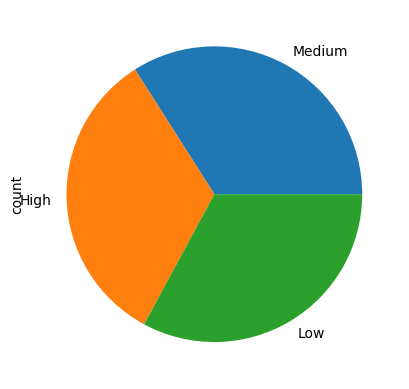

In [9]:
df["Rent_category"].value_counts().plot.pie()

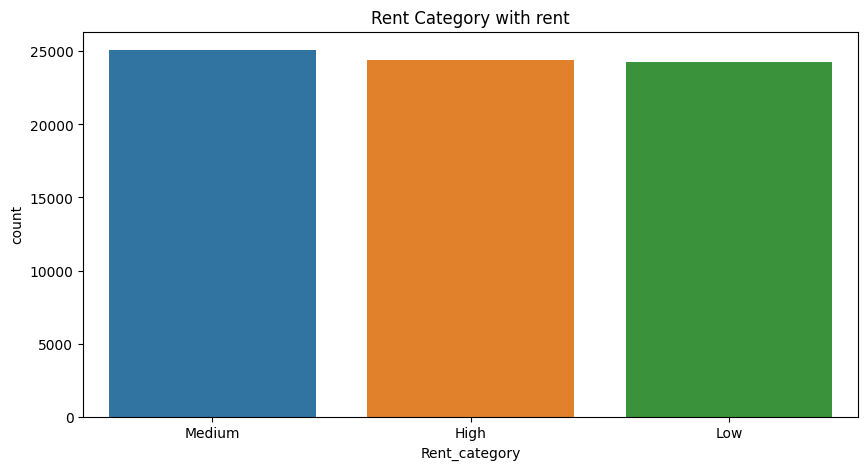

In [10]:
plt.figure(figsize=(10,5))
plt.title('Rent Category with rent')
sns.countplot(x='Rent_category', hue='Rent_category', data=df)
plt.show()

In [11]:
df[category_cols].head()

,Address,Type,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Location,City
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",Apartment,Medium,Yearly,Unfurnished,For Rent,2024-03-07,Al Reem Island,Abu Dhabi
1,"Water's Edge, Yas Island, Abu Dhabi",Apartment,Medium,Yearly,Unfurnished,For Rent,2024-03-08,Yas Island,Abu Dhabi
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",Apartment,Medium,Yearly,Furnished,For Rent,2024-03-21,Al Raha Beach,Abu Dhabi
3,"Marina Heights, Marina Square, Al Reem Island,...",Penthouse,High,Yearly,Unfurnished,For Rent,2024-02-24,Al Reem Island,Abu Dhabi
4,"West Yas, Yas Island, Abu Dhabi",Villa,High,Yearly,Unfurnished,For Rent,2024-02-16,Yas Island,Abu Dhabi


In [12]:
df[category_cols].isnull().sum()

Address          0
Type             0
Rent_category    0
Frequency        0
Furnishing       0
Purpose          0
Posted_date      0
Location         0
City             0
dtype: int64

# Feature Engineering
Perform feature engineering by creating new features from existing ones and encoding categorical variables.

In [13]:
df.drop(['Frequency','Purpose','Address'],axis=1,inplace=True)

In [14]:

df['Posted_date']=pd.to_datetime(df['Posted_date'])
df['Year']=df['Posted_date'].dt.year  
df['Month']=df['Posted_date'].dt.month
df['Day']=df['Posted_date'].dt.day
df.drop('Posted_date',axis=1,inplace=True)


In [15]:
#category_cols = ['Type','Furnishing', 'City']
pd.get_dummies(df.Type,drop_first=True).head()

,Hotel Apartment,Penthouse,Residential Building,Residential Floor,Residential Plot,Townhouse,Villa,Villa Compound
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False


In [16]:
pd.get_dummies(df.City,drop_first=True).head()

,Ajman,Al Ain,Dubai,Fujairah,Ras Al Khaimah,Sharjah,Umm Al Quwain
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [17]:
pd.get_dummies(df.Location,drop_first=True).head()

,Abu Krayyah,Abu Samrah,Abu Shagara,Address Fujairah Beach Resort,Airport Street,Ajman Downtown,Ajman Free Zone,Ajman Industrial,Ajman Marina,Ajman Uptown,...,Wadi Ammar,Wasit Suburb,Wasl Gate,World Trade Centre,Yas Island,Yasmin Village,Za'abeel,Zakhir,Zayed City,Zayed Sports City
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


# Numerical Data Analysis
Analyze numerical data by displaying descriptive statistics and plotting histograms and box plots.

In [18]:
num_cols=df.select_dtypes(include='number').columns

In [19]:
df[num_cols].isna().sum()

Rent                        0
Beds                        0
Baths                       0
Area_in_sqft                0
Rent_per_sqft               0
Age_of_listing_in_days      0
Latitude                  719
Longitude                 719
Year                        0
Month                       0
Day                         0
dtype: int64

In [20]:
df[num_cols].head()

,Rent,Beds,Baths,Area_in_sqft,Rent_per_sqft,Age_of_listing_in_days,Latitude,Longitude,Year,Month,Day
0,124000,3,4,1785,69.467787,45,24.493598,54.407841,2024,3,7
1,140000,3,4,1422,98.452883,44,24.494022,54.607372,2024,3,8
2,99000,2,3,1314,75.342466,31,24.485931,54.600939,2024,3,21
3,220000,3,4,3843,57.246942,57,24.493598,54.407841,2024,2,24
4,350000,5,7,6860,51.020408,65,24.494022,54.607372,2024,2,16


In [21]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rent                    73742 non-null  int64  
 1   Beds                    73742 non-null  int64  
 2   Baths                   73742 non-null  int64  
 3   Area_in_sqft            73742 non-null  int64  
 4   Rent_per_sqft           73742 non-null  float64
 5   Age_of_listing_in_days  73742 non-null  int64  
 6   Latitude                73023 non-null  float64
 7   Longitude               73023 non-null  float64
 8   Year                    73742 non-null  int32  
 9   Month                   73742 non-null  int32  
 10  Day                     73742 non-null  int32  
dtypes: float64(3), int32(3), int64(5)
memory usage: 5.3 MB


In [22]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Rent,73742.0,147925.001668,306965.830103,0.000000,54999.000000,98000.000000,170000.000000,5.500000e+07
Beds,73742.0,2.162811,1.578155,0.000000,1.000000,2.000000,3.000000,1.200000e+01
Baths,73742.0,2.650213,1.632997,1.000000,2.000000,2.000000,3.000000,1.100000e+01
Area_in_sqft,73742.0,2054.053552,3003.919252,74.000000,850.000000,1334.000000,2130.000000,2.102540e+05
Rent_per_sqft,73742.0,88.057754,66.534400,0.000000,39.977778,71.428571,118.483412,2.182045e+03
Age_of_listing_in_days,73742.0,74.261547,72.346767,11.000000,30.000000,52.000000,95.000000,2.276000e+03
Latitude,73023.0,24.918929,0.569356,15.175847,24.493598,25.078641,25.197978,2.592031e+01
Longitude,73023.0,55.053133,0.653722,43.351928,54.607372,55.238209,55.367138,5.636129e+01
Year,73742.0,2023.799707,0.413718,2018.000000,2024.000000,2024.000000,2024.000000,2.024000e+03
Month,73742.0,4.146592,3.286510,1.000000,2.000000,3.000000,4.000000,1.200000e+01


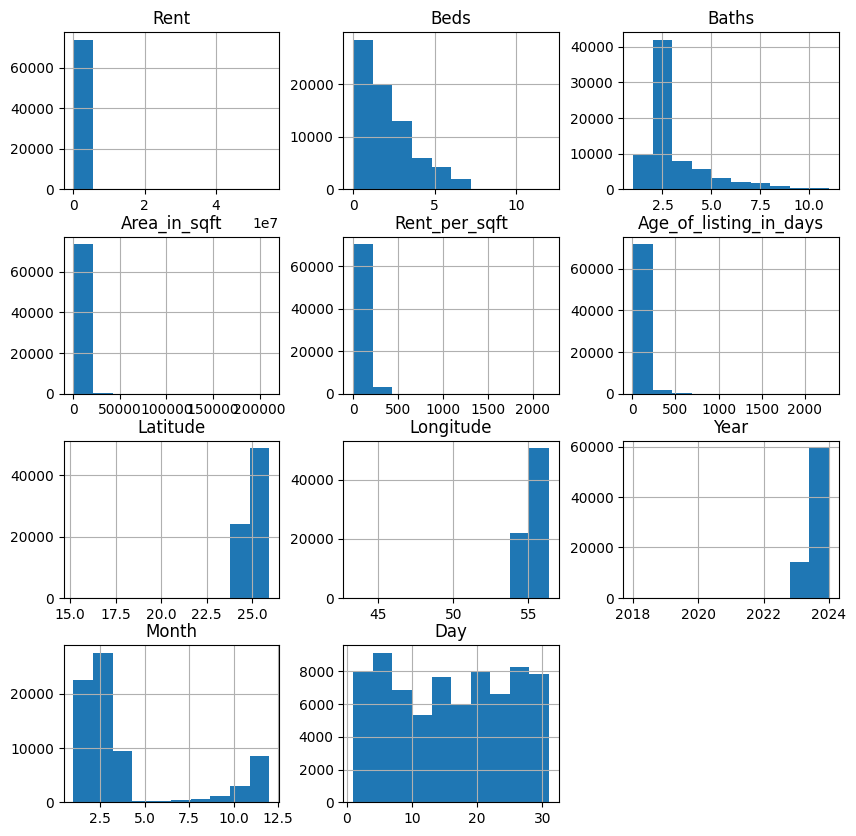

In [23]:
df[num_cols].hist(figsize=(10,10))
plt.show()

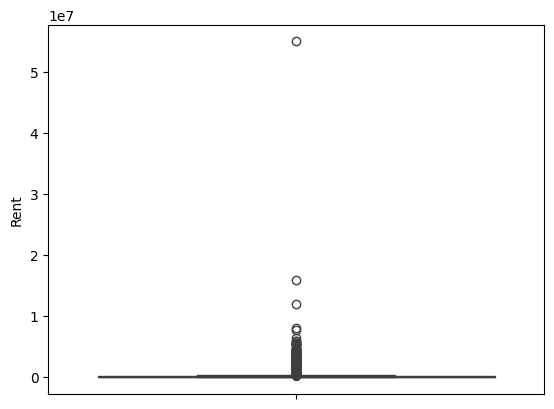

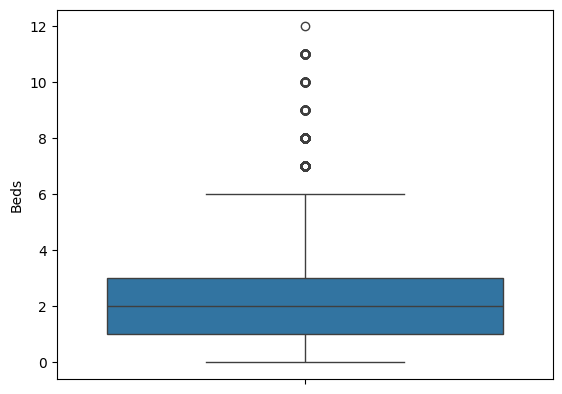

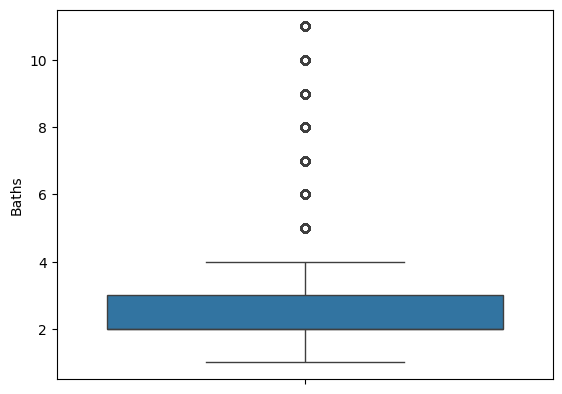

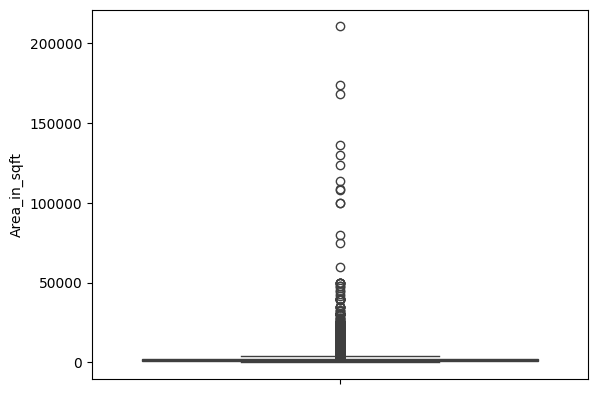

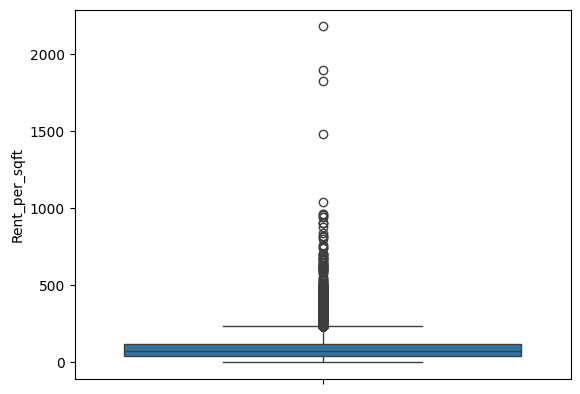

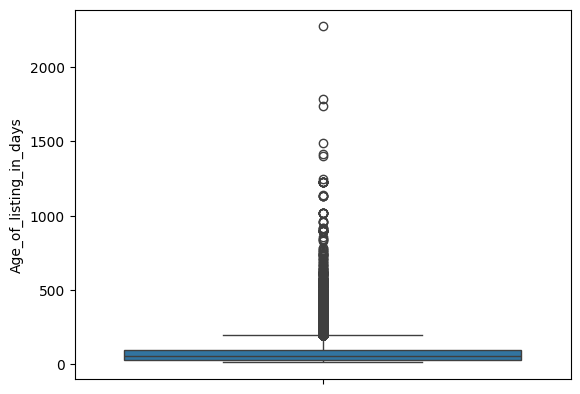

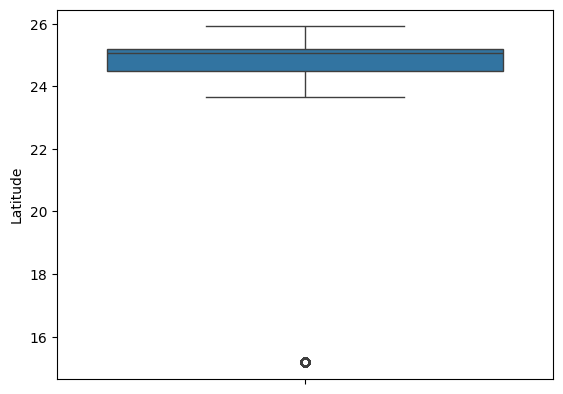

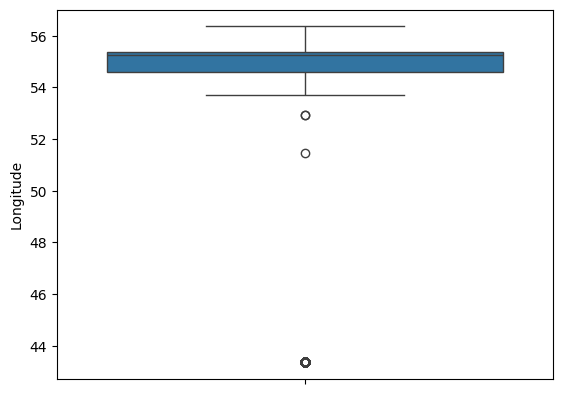

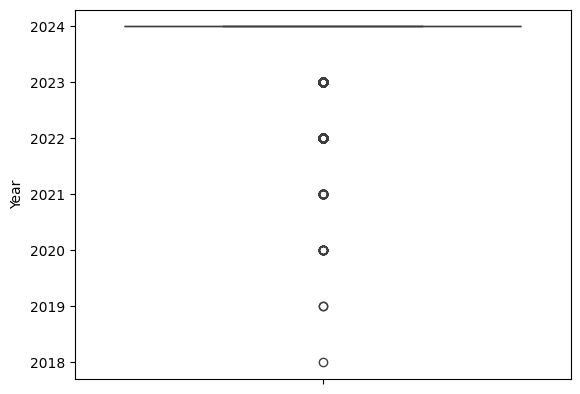

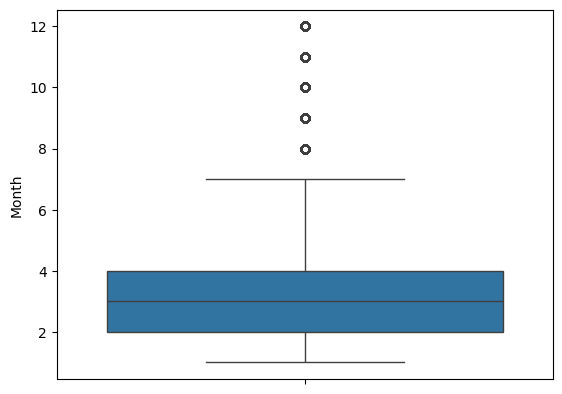

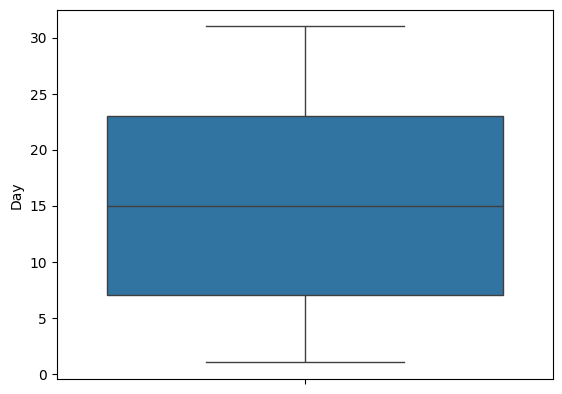

In [24]:
for var in num_cols:
    sns.boxplot(df[var])
    plt.show()


In [25]:
num_cols

Index(['Rent', 'Beds', 'Baths', 'Area_in_sqft', 'Rent_per_sqft',
       'Age_of_listing_in_days', 'Latitude', 'Longitude', 'Year', 'Month',
       'Day'],
      dtype='object')

# Outlier Detection
Detect outliers in numerical columns using the Interquartile Range (IQR) method.


In [26]:
IQR=df.Rent.quantile(0.75)-df.Rent.quantile(0.25)
lower_fence=df.Rent.quantile(0.25)-(IQR*3)
upper_fence=df.Rent.quantile(0.75)+(IQR*3)
print('Rent outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

Rent outliers are values < -290004.0 or > 515003.0


In [27]:
IQR=df.Area_in_sqft.quantile(0.75)-df.Area_in_sqft.quantile(0.25)
lower_fence=df.Area_in_sqft.quantile(0.25)-(IQR*3)
upper_fence=df.Area_in_sqft.quantile(0.75)+(IQR*3)
print('Area_in_sqft outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

Area_in_sqft outliers are values < -2990.0 or > 5970.0


In [28]:
IQR=df.Beds.quantile(0.75)-df.Beds.quantile(0.25)
lower_fence=df.Beds.quantile(0.25)-(IQR*3)
upper_fence=df.Beds.quantile(0.75)+(IQR*3)
print('Beds outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

Beds outliers are values < -5.0 or > 9.0


In [29]:
IQR=df.Baths.quantile(0.75)-df.Baths.quantile(0.25)
lower_fence=df.Baths.quantile(0.25)-(IQR*3)
upper_fence=df.Baths.quantile(0.75)+(IQR*3)
print('Baths outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

Baths outliers are values < -1.0 or > 6.0


In [30]:
IQR=df.Rent_per_sqft.quantile(0.75)-df.Rent_per_sqft.quantile(0.25)
lower_fence=df.Rent_per_sqft.quantile(0.25)-(IQR*3)
upper_fence=df.Rent_per_sqft.quantile(0.75)+(IQR*3)
print('Rent_per_sqft outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

Rent_per_sqft outliers are values < -195.5391258557135 or > 354.00031595576615


In [31]:
IQR=df.Age_of_listing_in_days.quantile(0.75)-df.Age_of_listing_in_days.quantile(0.25)
lower_fence=df.Age_of_listing_in_days.quantile(0.25)-(IQR*3)
upper_fence=df.Age_of_listing_in_days.quantile(0.75)+(IQR*3)
print('Age_of_listing_in_days outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

Age_of_listing_in_days outliers are values < -165.0 or > 290.0


In [32]:
IQR=df.Latitude.quantile(0.75)-df.Latitude.quantile(0.25)
lower_fence=df.Latitude.quantile(0.25)-(IQR*3)
upper_fence=df.Latitude.quantile(0.75)+(IQR*3)
print('Latitude outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

Latitude outliers are values < 22.380459600000002 or > 27.311116799999997


In [33]:
IQR=df.Longitude.quantile(0.75)-df.Longitude.quantile(0.25)
lower_fence=df.Longitude.quantile(0.25)-(IQR*3)
upper_fence=df.Longitude.quantile(0.75)+(IQR*3)
print('Longitude outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

Longitude outliers are values < 52.32807497381102 or > 57.64643493491864


In [34]:
IQR=df.Year.quantile(0.75)-df.Year.quantile(0.25)
lower_fence=df.Year.quantile(0.25)-(IQR*3)
upper_fence=df.Year.quantile(0.75)+(IQR*3)
print('Year outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

Year outliers are values < 2024.0 or > 2024.0


In [35]:
IQR=df.Month.quantile(0.75)-df.Month.quantile(0.25)
lower_fence=df.Month.quantile(0.25)-(IQR*3)
upper_fence=df.Month.quantile(0.75)+(IQR*3)
print('Month outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))


Month outliers are values < -4.0 or > 10.0


In [36]:
df

,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Furnishing,Age_of_listing_in_days,Location,City,Latitude,Longitude,Year,Month,Day
0,124000,3,4,Apartment,1785,69.467787,Medium,Unfurnished,45,Al Reem Island,Abu Dhabi,24.493598,54.407841,2024,3,7
1,140000,3,4,Apartment,1422,98.452883,Medium,Unfurnished,44,Yas Island,Abu Dhabi,24.494022,54.607372,2024,3,8
2,99000,2,3,Apartment,1314,75.342466,Medium,Furnished,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939,2024,3,21
3,220000,3,4,Penthouse,3843,57.246942,High,Unfurnished,57,Al Reem Island,Abu Dhabi,24.493598,54.407841,2024,2,24
4,350000,5,7,Villa,6860,51.020408,High,Unfurnished,65,Yas Island,Abu Dhabi,24.494022,54.607372,2024,2,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73737,14000,0,1,Apartment,419,33.412888,Low,Unfurnished,129,Al Salamah,Umm Al Quwain,25.493412,55.575994,2023,12,14
73738,14000,0,1,Apartment,500,28.000000,Low,Unfurnished,129,Umm Al Quwain Marina,Umm Al Quwain,25.527959,55.606527,2023,12,14
73739,50000,3,4,Apartment,2000,25.000000,Low,Unfurnished,110,King Faisal Street,Umm Al Quwain,NaN,NaN,2024,1,2
73740,37000,1,2,Apartment,989,37.411527,Low,Unfurnished,181,Al Maqtaa,Umm Al Quwain,NaN,NaN,2023,10,23


# Splitting the Data
Split the data into training and testing sets using Scikit-learn's train_test_split function.

In [37]:
X=df.drop('Rent',axis=1)
y=df['Rent']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
y_train.value_counts()

Rent
120000     1353
75000      1314
150000     1303
110000     1239
85000      1169
           ... 
245995        1
159980        1
499998        1
2550000       1
55200         1
Name: count, Length: 1904, dtype: int64

In [40]:
X_train.shape, X_test.shape

((58993, 15), (14749, 15))

In [41]:
X_train.dtypes

Beds                        int64
Baths                       int64
Type                       object
Area_in_sqft                int64
Rent_per_sqft             float64
Rent_category              object
Furnishing                 object
Age_of_listing_in_days      int64
Location                   object
City                       object
Latitude                  float64
Longitude                 float64
Year                        int32
Month                       int32
Day                         int32
dtype: object

# Handling Missing Values in Train/Test Sets
Handle missing values in the training and testing sets by filling them with the median value.

In [42]:
categorical=[col for col in X_train.columns if X_train[col].dtypes=='O']
print(categorical)

numerical=[col for col in X_train.columns if X_train[col].dtypes!='O']
print(numerical)

['Type', 'Rent_category', 'Furnishing', 'Location', 'City']
['Beds', 'Baths', 'Area_in_sqft', 'Rent_per_sqft', 'Age_of_listing_in_days', 'Latitude', 'Longitude', 'Year', 'Month', 'Day']


In [43]:
X_train[numerical].isna().sum()

Beds                        0
Baths                       0
Area_in_sqft                0
Rent_per_sqft               0
Age_of_listing_in_days      0
Latitude                  572
Longitude                 572
Year                        0
Month                       0
Day                         0
dtype: int64

In [44]:
X_test[numerical].isnull().sum()

Beds                        0
Baths                       0
Area_in_sqft                0
Rent_per_sqft               0
Age_of_listing_in_days      0
Latitude                  147
Longitude                 147
Year                        0
Month                       0
Day                         0
dtype: int64

In [45]:
for df1 in [X_train,X_test]:
    for var in numerical:
        col_median=X_train[var].median()
        df1[var].fillna(col_median,inplace=True)

/var/folders/mk/zxcr38nx6n5bkqm327y0r6dc0000gn/T/ipykernel_28896/2202464879.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[var].fillna(col_median,inplace=True)
/var/folders/mk/zxcr38nx6n5bkqm327y0r6dc0000gn/T/ipykernel_28896/2202464879.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [46]:
X_train[numerical].isna().sum()

Beds                      0
Baths                     0
Area_in_sqft              0
Rent_per_sqft             0
Age_of_listing_in_days    0
Latitude                  0
Longitude                 0
Year                      0
Month                     0
Day                       0
dtype: int64

In [47]:
X_test[numerical].isna().sum()

Beds                      0
Baths                     0
Area_in_sqft              0
Rent_per_sqft             0
Age_of_listing_in_days    0
Latitude                  0
Longitude                 0
Year                      0
Month                     0
Day                       0
dtype: int64

In [48]:
X_train[categorical].isna().sum()

Type             0
Rent_category    0
Furnishing       0
Location         0
City             0
dtype: int64

In [49]:
X_test[categorical].isna().sum()

Type             0
Rent_category    0
Furnishing       0
Location         0
City             0
dtype: int64

# Handling Outliers in Train/Test Sets
Handle outliers in the training and testing sets by capping them at a specified threshold.

In [50]:
def max_value(df, variable, top):
    return np.where(df[variable] > top, top, df[variable])

for df1 in [X_train, X_test]:
    df1['Rent_per_sqft'] = max_value(df1, 'Rent_per_sqft', 354.00031595576615)
    df1['Age_of_listing_in_days'] = max_value(df1, 'Age_of_listing_in_days', 290.0)
    df1['Latitude'] = max_value(df1, 'Latitude', 27.311116799999997)
    df1['Longitude'] = max_value(df1, 'Longitude', 57.64643493491864)
    df1['Year'] = max_value(df1, 'Year', 2024.0)
    df1['Beds'] = max_value(df1, 'Beds', 9.0)
    df1['Baths'] = max_value(df1, 'Baths', 6.0)
    df1['Area_in_sqft'] = max_value(df1, 'Area_in_sqft', 5970.0)
    df1['Month'] = max_value(df1, 'Month', 10.0)

y_train = max_value(y_train.to_frame(), 'Rent', 515003.0).squeeze()
y_test = max_value(y_test.to_frame(), 'Rent', 515003.0).squeeze()

In [51]:
X_train[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
Beds,58993.0,2.161494,1.561930,0.000000,1.000000,2.000000,3.000000,9.000000
Baths,58993.0,2.561067,1.350347,1.000000,2.000000,2.000000,3.000000,6.000000
Area_in_sqft,58993.0,1819.058634,1459.127599,74.000000,850.000000,1334.000000,2140.000000,5970.000000
Rent_per_sqft,58993.0,87.408993,61.953700,0.000000,40.000000,71.428571,118.518148,354.000316
Age_of_listing_in_days,58993.0,72.215195,59.722449,11.000000,30.000000,52.000000,95.000000,290.000000
Latitude,58993.0,24.920026,0.562408,15.175847,24.493598,25.078641,25.197978,25.920310
Longitude,58993.0,55.053919,0.645238,43.351928,54.607372,55.223830,55.360380,56.361294
Year,58993.0,2023.800197,0.413445,2018.000000,2024.000000,2024.000000,2024.000000,2024.000000
Month,58993.0,3.963199,2.888416,1.000000,2.000000,3.000000,4.000000,10.000000
Day,58993.0,15.467276,8.977053,1.000000,7.000000,15.000000,23.000000,31.000000


In [52]:
categorical

['Type', 'Rent_category', 'Furnishing', 'Location', 'City']

In [53]:
X_train[categorical].head()

,Type,Rent_category,Furnishing,Location,City
15517,Apartment,Low,Unfurnished,Al Reem Island,Abu Dhabi
58037,Apartment,Medium,Unfurnished,Discovery Gardens,Dubai
55267,Apartment,High,Unfurnished,Bluewaters Island,Dubai
34555,Villa,High,Unfurnished,Jumeirah Park,Dubai
12241,Apartment,Low,Unfurnished,Al Reem Island,Abu Dhabi


# Encoding Categorical Variables
Encode categorical variables using BinaryEncoder and OrdinalEncoder.

In [54]:
encoderB=ce.BinaryEncoder(cols=['Furnishing'])
X_train=encoderB.fit_transform(X_train)
X_test=encoderB.transform(X_test)

encoderU=ce.OrdinalEncoder(cols=['Rent_category'])
X_train=encoderU.fit_transform(X_train)
X_test=encoderU.transform(X_test)

In [55]:
X_train.head()

,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Furnishing_0,Furnishing_1,Age_of_listing_in_days,Location,City,Latitude,Longitude,Year,Month,Day
15517,0.0,1.0,Apartment,556.0,80.935252,1,0,1,109.0,Al Reem Island,Abu Dhabi,24.493598,54.407841,2024.0,1.0,3
58037,2.0,2.0,Apartment,1450.0,58.620690,2,0,1,12.0,Discovery Gardens,Dubai,25.038271,55.145696,2024.0,4.0,9
55267,2.0,2.0,Apartment,1501.0,306.462358,3,0,1,88.0,Bluewaters Island,Dubai,25.082916,55.122156,2024.0,1.0,24
34555,4.0,2.0,Villa,4500.0,117.777778,3,0,1,17.0,Jumeirah Park,Dubai,25.046941,55.154818,2024.0,4.0,4
12241,2.0,3.0,Apartment,1350.0,48.148148,1,0,1,127.0,Al Reem Island,Abu Dhabi,24.493598,54.407841,2023.0,10.0,16


In [56]:
X_train = pd.concat([X_train[numerical], X_train[['Furnishing_0', 'Furnishing_1']],
                     pd.get_dummies(X_train.Type, prefix='Type'),
                     pd.get_dummies(X_train.City, prefix='City'),
                     pd.get_dummies(X_train.Location, prefix='Location')], axis=1)

In [57]:
X_train.head()

,Beds,Baths,Area_in_sqft,Rent_per_sqft,Age_of_listing_in_days,Latitude,Longitude,Year,Month,Day,...,Location_Wadi Al Shabak,Location_Wasit Suburb,Location_Wasl Gate,Location_World Trade Centre,Location_Yas Island,Location_Yasmin Village,Location_Za'abeel,Location_Zakhir,Location_Zayed City,Location_Zayed Sports City
15517,0.0,1.0,556.0,80.935252,109.0,24.493598,54.407841,2024.0,1.0,3,...,False,False,False,False,False,False,False,False,False,False
58037,2.0,2.0,1450.0,58.620690,12.0,25.038271,55.145696,2024.0,4.0,9,...,False,False,False,False,False,False,False,False,False,False
55267,2.0,2.0,1501.0,306.462358,88.0,25.082916,55.122156,2024.0,1.0,24,...,False,False,False,False,False,False,False,False,False,False
34555,4.0,2.0,4500.0,117.777778,17.0,25.046941,55.154818,2024.0,4.0,4,...,False,False,False,False,False,False,False,False,False,False
12241,2.0,3.0,1350.0,48.148148,127.0,24.493598,54.407841,2023.0,10.0,16,...,False,False,False,False,False,False,False,False,False,False


In [58]:
X_train.shape

(58993, 456)

In [59]:

X_test = pd.concat([X_test[numerical], X_test[['Furnishing_0', 'Furnishing_1']],
                    pd.get_dummies(X_test.Type, prefix='Type'),
                    pd.get_dummies(X_test.City, prefix='City'),
                    pd.get_dummies(X_test.Location, prefix='Location')], axis=1)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [60]:
X_test.head()

,Beds,Baths,Area_in_sqft,Rent_per_sqft,Age_of_listing_in_days,Latitude,Longitude,Year,Month,Day,...,Location_Wadi Al Shabak,Location_Wasit Suburb,Location_Wasl Gate,Location_World Trade Centre,Location_Yas Island,Location_Yasmin Village,Location_Za'abeel,Location_Zakhir,Location_Zayed City,Location_Zayed Sports City
72919,0.0,1.0,330.0,42.424242,37.0,25.300001,55.441618,2024.0,3.0,15,...,False,False,False,False,False,False,False,False,False,False
34194,1.0,2.0,767.0,78.224250,17.0,25.118441,55.387147,2024.0,4.0,4,...,False,False,False,False,False,False,False,False,False,False
51325,2.0,2.0,1187.0,185.341196,44.0,25.164059,55.285661,2024.0,3.0,8,...,False,False,False,False,False,False,False,False,False,False
51427,2.0,2.0,1102.0,226.860254,149.0,25.197978,55.360380,2023.0,10.0,24,...,False,False,False,False,False,False,False,False,False,False
19695,3.0,4.0,1496.0,80.213904,25.0,24.494022,54.607372,2024.0,3.0,27,...,False,False,False,False,True,False,False,False,False,False


In [61]:
cols=X_train.columns

# Scaling Numerical Features
Scale numerical features using MinMaxScaler.

In [62]:

scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [63]:
X_train=pd.DataFrame(X_train,columns=[cols])
X_test=pd.DataFrame(X_test,columns=[cols])

In [64]:
X_train.head()

,Beds,Baths,Area_in_sqft,Rent_per_sqft,Age_of_listing_in_days,Latitude,Longitude,Year,Month,Day,...,Location_Wadi Al Shabak,Location_Wasit Suburb,Location_Wasl Gate,Location_World Trade Centre,Location_Yas Island,Location_Yasmin Village,Location_Za'abeel,Location_Zakhir,Location_Zayed City,Location_Zayed Sports City
0,-1.0,-1.0,-0.603101,0.121076,0.876923,-0.830579,-1.083641,0.0,-1.0,-0.7500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.089922,-0.163120,-0.615385,-0.057314,-0.103763,0.0,0.5,-0.3750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.129457,2.993369,0.553846,0.006068,-0.135024,0.0,-1.0,0.5625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,2.454264,0.590299,-0.538462,-0.045005,-0.091649,0.0,0.5,-0.6875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.012403,-0.296497,1.153846,-0.830579,-1.083641,-1.0,3.5,0.0625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
X_train.tail()

,Beds,Baths,Area_in_sqft,Rent_per_sqft,Age_of_listing_in_days,Latitude,Longitude,Year,Month,Day,...,Location_Wadi Al Shabak,Location_Wasit Suburb,Location_Wasl Gate,Location_World Trade Centre,Location_Yas Island,Location_Yasmin Village,Location_Za'abeel,Location_Zakhir,Location_Zayed City,Location_Zayed Sports City
58988,0.5,2.0,0.355039,0.511711,-0.123077,-0.829977,-0.818661,0.0,0.0,-0.4375,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
58989,-0.5,0.0,-0.299225,-0.103638,-0.276923,-0.032223,-0.021733,0.0,0.0,0.1875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58990,-0.5,0.0,-0.390698,1.391963,-0.107692,0.000000,-0.117632,0.0,0.0,-0.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58991,0.5,0.0,0.693798,0.575863,-0.076923,-0.001192,-0.117727,0.0,0.0,-0.6250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58992,-0.5,-1.0,-0.336434,-0.244610,-0.292308,0.309144,0.289990,0.0,0.0,0.2500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Beds,58993.0,0.080747,0.780965,-1.000000,-0.500000,0.0,0.500000,3.500000
Baths,58993.0,0.561067,1.350347,-1.000000,0.000000,0.0,1.000000,4.000000
Area_in_sqft,58993.0,0.376014,1.131107,-0.976744,-0.375194,0.0,0.624806,3.593798
Rent_per_sqft,58993.0,0.203525,0.789037,-0.909708,-0.400271,0.0,0.599729,3.598808
Age_of_listing_in_days,58993.0,0.311003,0.918807,-0.630769,-0.338462,0.0,0.661538,3.661538
...,...,...,...,...,...,...,...,...
Location_Yasmin Village,58993.0,0.000339,0.018410,0.000000,0.000000,0.0,0.000000,1.000000
Location_Za'abeel,58993.0,0.006136,0.078095,0.000000,0.000000,0.0,0.000000,1.000000
Location_Zakhir,58993.0,0.000576,0.024000,0.000000,0.000000,0.0,0.000000,1.000000
Location_Zayed City,58993.0,0.000390,0.019742,0.000000,0.000000,0.0,0.000000,1.000000


In [67]:
X_train[:5]

,Beds,Baths,Area_in_sqft,Rent_per_sqft,Age_of_listing_in_days,Latitude,Longitude,Year,Month,Day,...,Location_Wadi Al Shabak,Location_Wasit Suburb,Location_Wasl Gate,Location_World Trade Centre,Location_Yas Island,Location_Yasmin Village,Location_Za'abeel,Location_Zakhir,Location_Zayed City,Location_Zayed Sports City
0,-1.0,-1.0,-0.603101,0.121076,0.876923,-0.830579,-1.083641,0.0,-1.0,-0.7500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.089922,-0.163120,-0.615385,-0.057314,-0.103763,0.0,0.5,-0.3750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.129457,2.993369,0.553846,0.006068,-0.135024,0.0,-1.0,0.5625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,2.454264,0.590299,-0.538462,-0.045005,-0.091649,0.0,0.5,-0.6875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.012403,-0.296497,1.153846,-0.830579,-1.083641,-1.0,3.5,0.0625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
y_train[:5]

array([ 45000.,  85000., 460000., 515003.,  65000.])

# Model Training and Evaluation
Train and evaluate different models, including Linear Regression, Decision Tree, and Random Forest, and compare their performance.

In [73]:

def evaluate_models(X_train, y_train, X_test, y_test, max_depth=None):
    models = {
        "Linear Regression": LinearRegression(),
        "Decision Tree": DecisionTreeRegressor(max_depth=max_depth, random_state=42),
        "Random Forest": RandomForestRegressor(max_depth=max_depth, random_state=42),
    }

    print("\n📊 Model Performance Comparison:\n")
    print("=" * 50)

    for name, model in models.items():
        model.fit(X_train, y_train)
        
        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Train Scores
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = train_mse ** 0.5
        train_mae = mean_absolute_error(y_train, y_train_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        
        # Test Scores
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = test_mse ** 0.5
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        # Print results
        print(f"\n📌 {name}")
        print("-" * 50)
        print(f"🔹 Train Scores:")
        print(f"   - MSE: {train_mse:.4f}")
        print(f"   - RMSE: {train_rmse:.4f}")
        print(f"   - MAE: {train_mae:.4f}")
        print(f"   - R² Score: {train_r2:.4f}")
        
        print(f"\n🔹 Test Scores:")
        print(f"   - MSE: {test_mse:.4f}")
        print(f"   - RMSE: {test_rmse:.4f}")
        print(f"   - MAE: {test_mae:.4f}")
        print(f"   - R² Score: {test_r2:.4f}")

        print("=" * 50)

# على سبيل المثال، لتقليل عمق الشجرة إلى 7:
evaluate_models(X_train, y_train, X_test, y_test, max_depth=10)


📊 Model Performance Comparison:


📌 Linear Regression
--------------------------------------------------
🔹 Train Scores:
   - MSE: 1437092492.8164
   - RMSE: 37909.0028
   - MAE: 25559.4250
   - R² Score: 0.8830

🔹 Test Scores:
   - MSE: 1455544418.8425
   - RMSE: 38151.5979
   - MAE: 25707.2684
   - R² Score: 0.8837

📌 Decision Tree
--------------------------------------------------
🔹 Train Scores:
   - MSE: 125202287.6365
   - RMSE: 11189.3828
   - MAE: 5138.9059
   - R² Score: 0.9898

🔹 Test Scores:
   - MSE: 178196921.8737
   - RMSE: 13349.0420
   - MAE: 5749.8677
   - R² Score: 0.9858

📌 Random Forest
--------------------------------------------------
🔹 Train Scores:
   - MSE: 88376508.1960
   - RMSE: 9400.8781
   - MAE: 3146.5902
   - R² Score: 0.9928

🔹 Test Scores:
   - MSE: 125851680.7098
   - RMSE: 11218.3635
   - MAE: 3511.0777
   - R² Score: 0.9899
